# I] Import and options


In [45]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# have text as text and not curve in .svg
matplotlib.rcParams['svg.fonttype'] = 'none'
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':24, 'xtick.labelsize':20, 
                            'ytick.labelsize':20, 'figure.figsize':(12, 8)})

In [46]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [47]:
%%time
#DL + open
path = input_file_directory + "mefs/mefs_proliferation/exp1_proliferation.csv"
prolif_df = pandas.read_csv(path, sep = ";")
#change comma to dot
prolif_df = prolif_df.astype(str)
prolif_df = prolif_df.apply(lambda x: x.str.replace(',','.'))
#convert to float
prolif_df = prolif_df.astype(float)
prolif_df = prolif_df.iloc[:31,:]
print(prolif_df.shape)
prolif_df.tail()

(31, 49)
Wall time: 22.9 ms


Elapsed  Normal + DMEM + DMSO  EV + DMEM + DMSO  WT1 + DMEM + DMSO  \
26     52.0              86.82537          94.97466           98.28023   
27     54.0              91.09386          92.59055           95.63158   
28     56.0              94.62511          94.85287           98.22715   
29     58.0              96.35883          96.68823           98.52901   
30     60.0              95.47753          97.60972           98.94588   

    dVSR(1) + DMEM + DMSO  WT2 + DMEM + DMSO  dVSR(2) + DMEM + DMSO  \
26               96.87165           91.70433               96.42653   
27               92.18909           83.09866               96.64404   
28               97.70577           92.93327               98.32720   
29               97.82701           94.64336               97.99445   
30               97.17578           92.79214               97.79563   

    Normal + DMEM + BAF  EV + DMEM + BAF  WT1 + DMEM + BAF  ...  \
26             69.76159         62.73172          77.88731  ...   
27             74.52564         71.13065          83.69419  ...   
28             80.08359         83.17780          92.49662  ...   
29             78.96611         84.68988          91.86390  ...   
30             69.09030         70.62864          84.43202  ...   

    WT1 + Starvation + DMSO (Std Err Img)  \
26                               3.091698   
27                               4.319202   
28                               6.036583   
29                               6.222861   
30                               3.224854   

    dVSR(1) + Starvation + DMSO (Std Err Img)  \
26                                   3.308378   
27                                   2.749834   
28                                   2.253902   
29                                   2.711493   
30                                   2.597328   

    WT2 + Starvation + DMSO (Std Err Img)  \
26                               2.522672   
27                               3.140880   
28                               3.614776   
29                               2.296404   
30                               1.912236   

    dVSR(2) + Starvation + DMSO (Std Err Img)  \
26                                   3.027512   
27                                   3.444478   
28                                   3.440794   
29                                   2.998320   
30                                   2.211504   

    Normal + Starvation + BAF (Std Err Img)  \
26                                 2.855083   
27                                 2.760447   
28                                 2.758153   
29                                 2.866705   
30                                 2.475111   

    EV + Starvation + BAF (Std Err Img)  WT1 + Starvation + BAF (Std Err Img)  \
26                             2.157001                              3.642731   
27                             2.854899                              3.951364   
28                             3.101831                              4.040591   
29                             1.957413                              4.385201   
30                             2.604975                              4.567994   

    dVSR(1) + Starvation + BAF (Std Err Img)  \
26                                  2.490677   
27                                  3.387626   
28                                  4.357156   
29                                  4.414485   
30                                  3.488782   

    WT2 + Starvation + BAF (Std Err Img)  \
26                              2.294660   
27                              2.997449   
28                              3.960287   
29                              3.758769   
30                              2.819020   

    dVSR(2) + Starvation + BAF (Std Err Img)  
26                                  1.953691  
27                                  2.887991  
28                                  3.412214  
29                                  3.228660  
30                                  2.

In [48]:
#I have 6 cell lines per condition and 4 conditions
#List of Columns
##select RICH DMEM with only dmso
prolif_rich_DMSO = prolif_df.iloc[:,1:7].columns
##select RICH DMEM with only baf
prolif_rich_BAF = prolif_df.iloc[:,7:13].columns
##df with STARV with only dmso
prolif_starv_DMSO = prolif_df.iloc[:,13:19].columns
##df with STARV with only baf
prolif_starv_BAF = prolif_df.iloc[:,19:25].columns

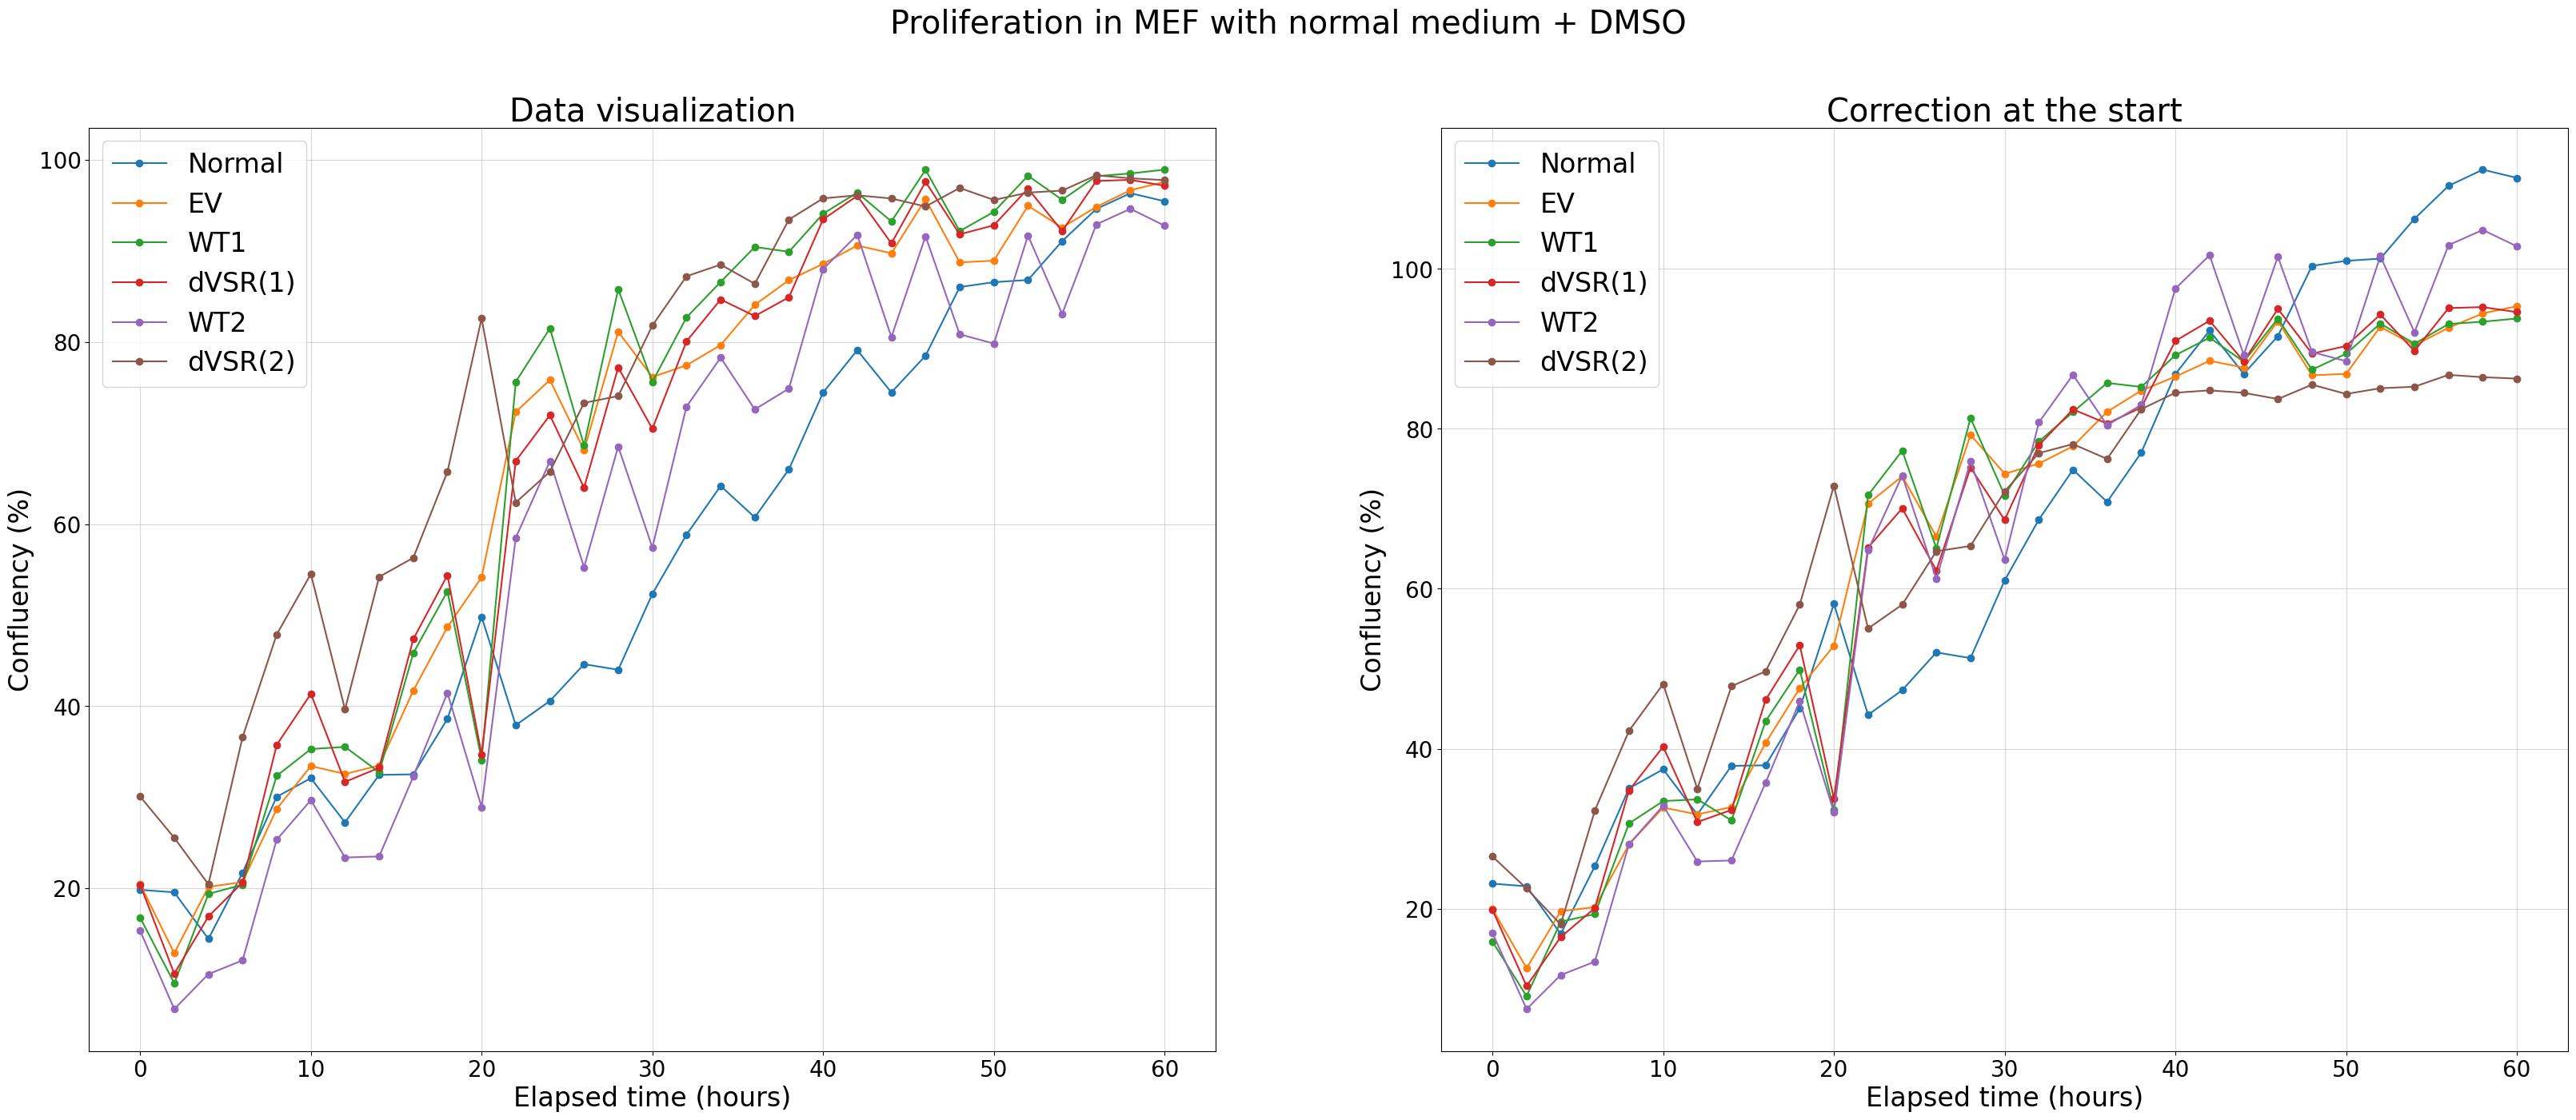

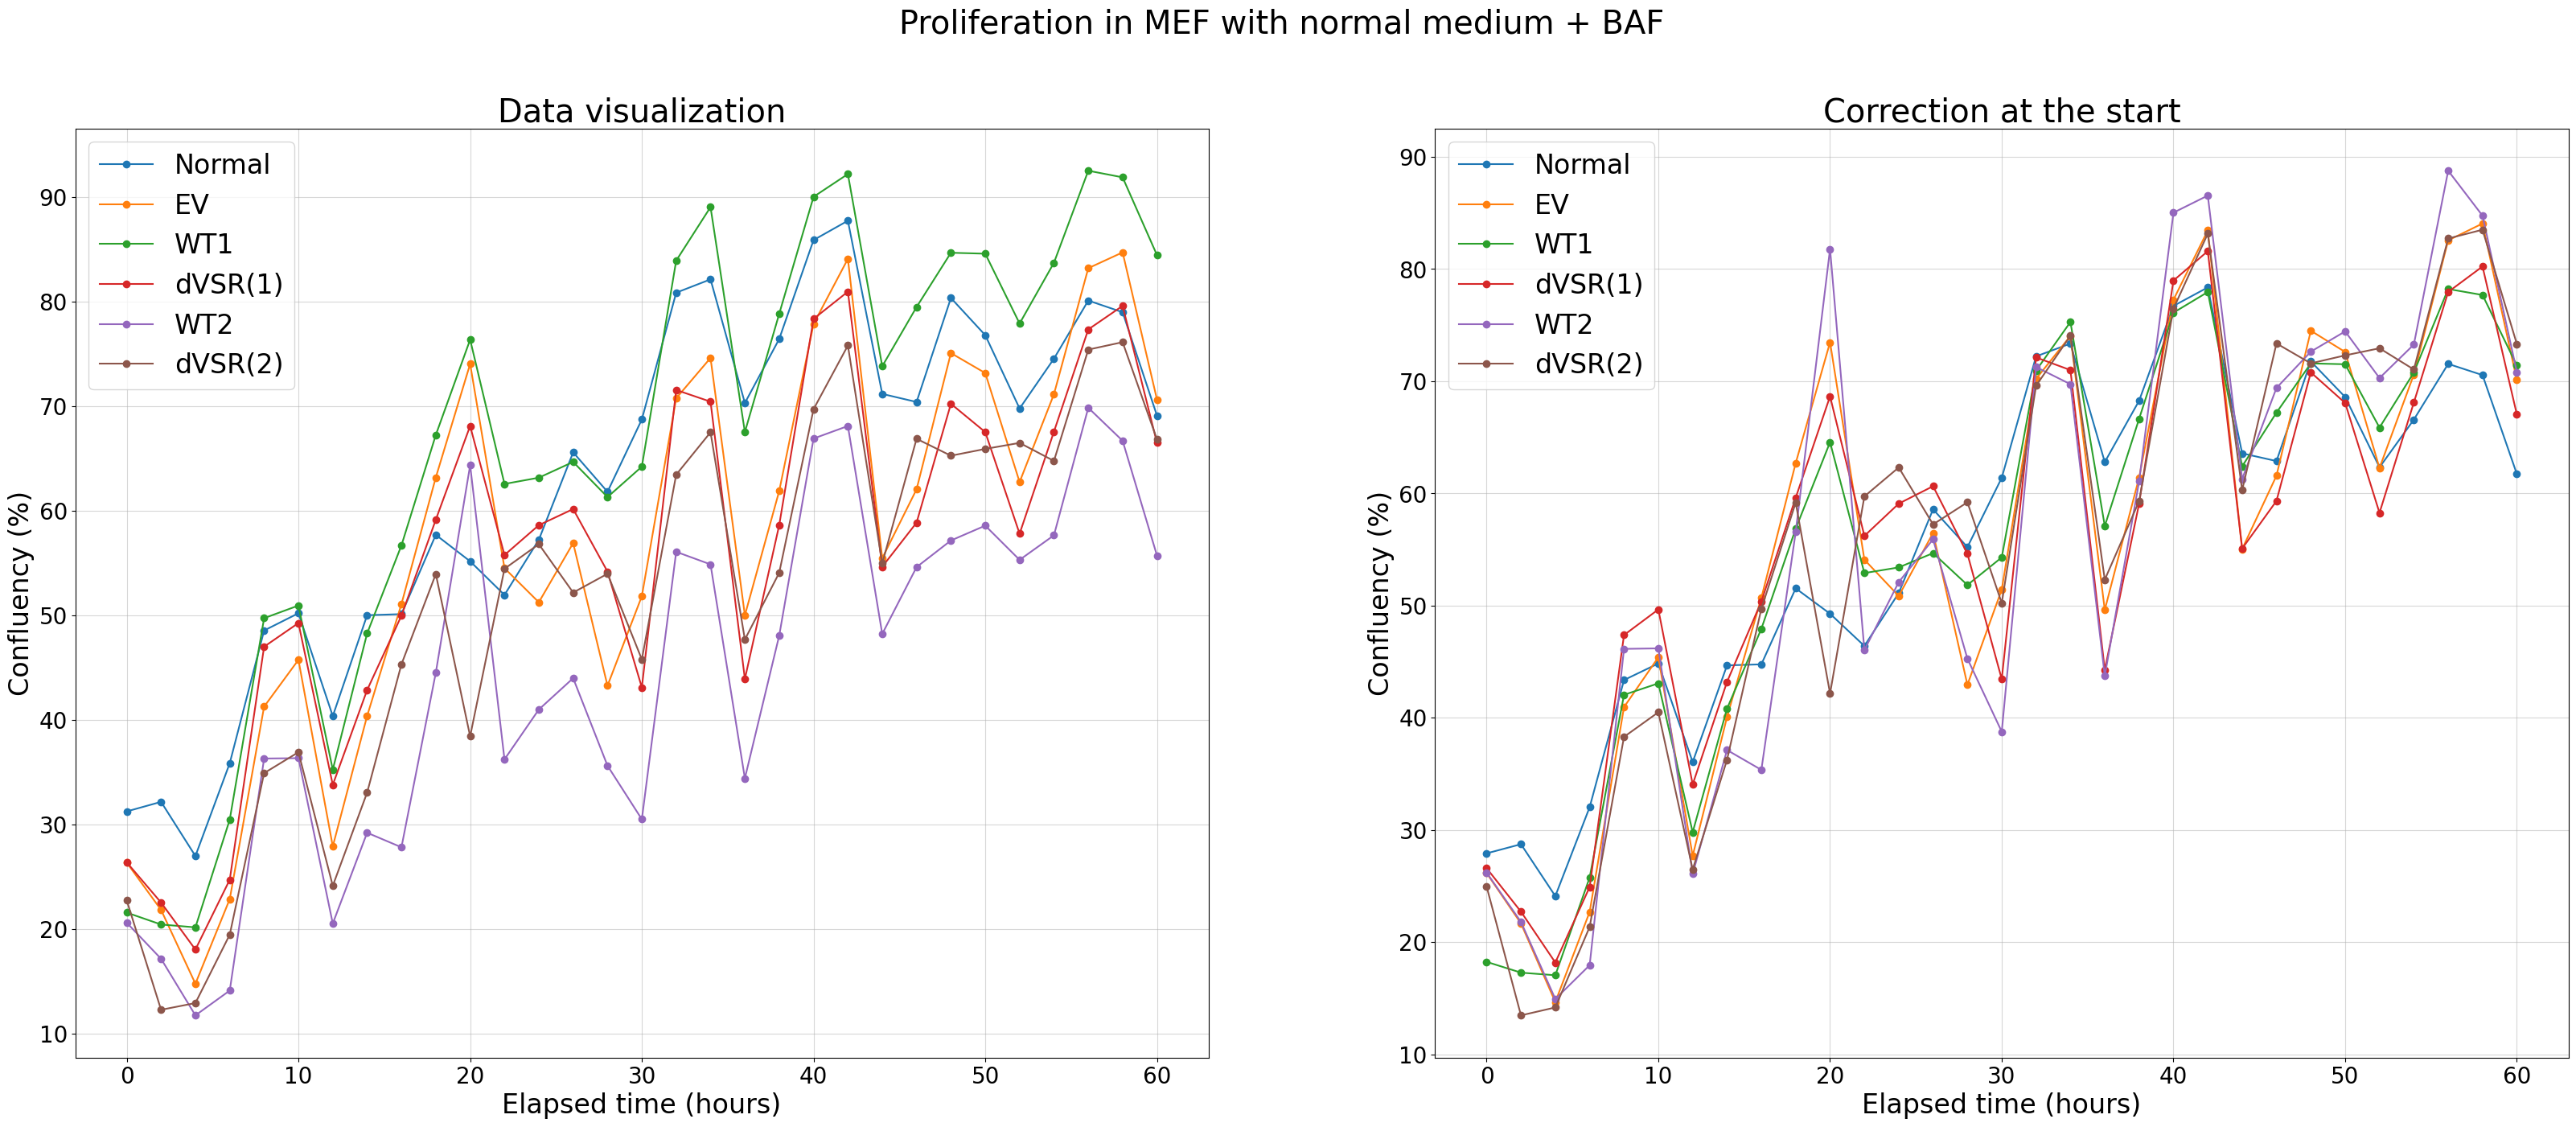

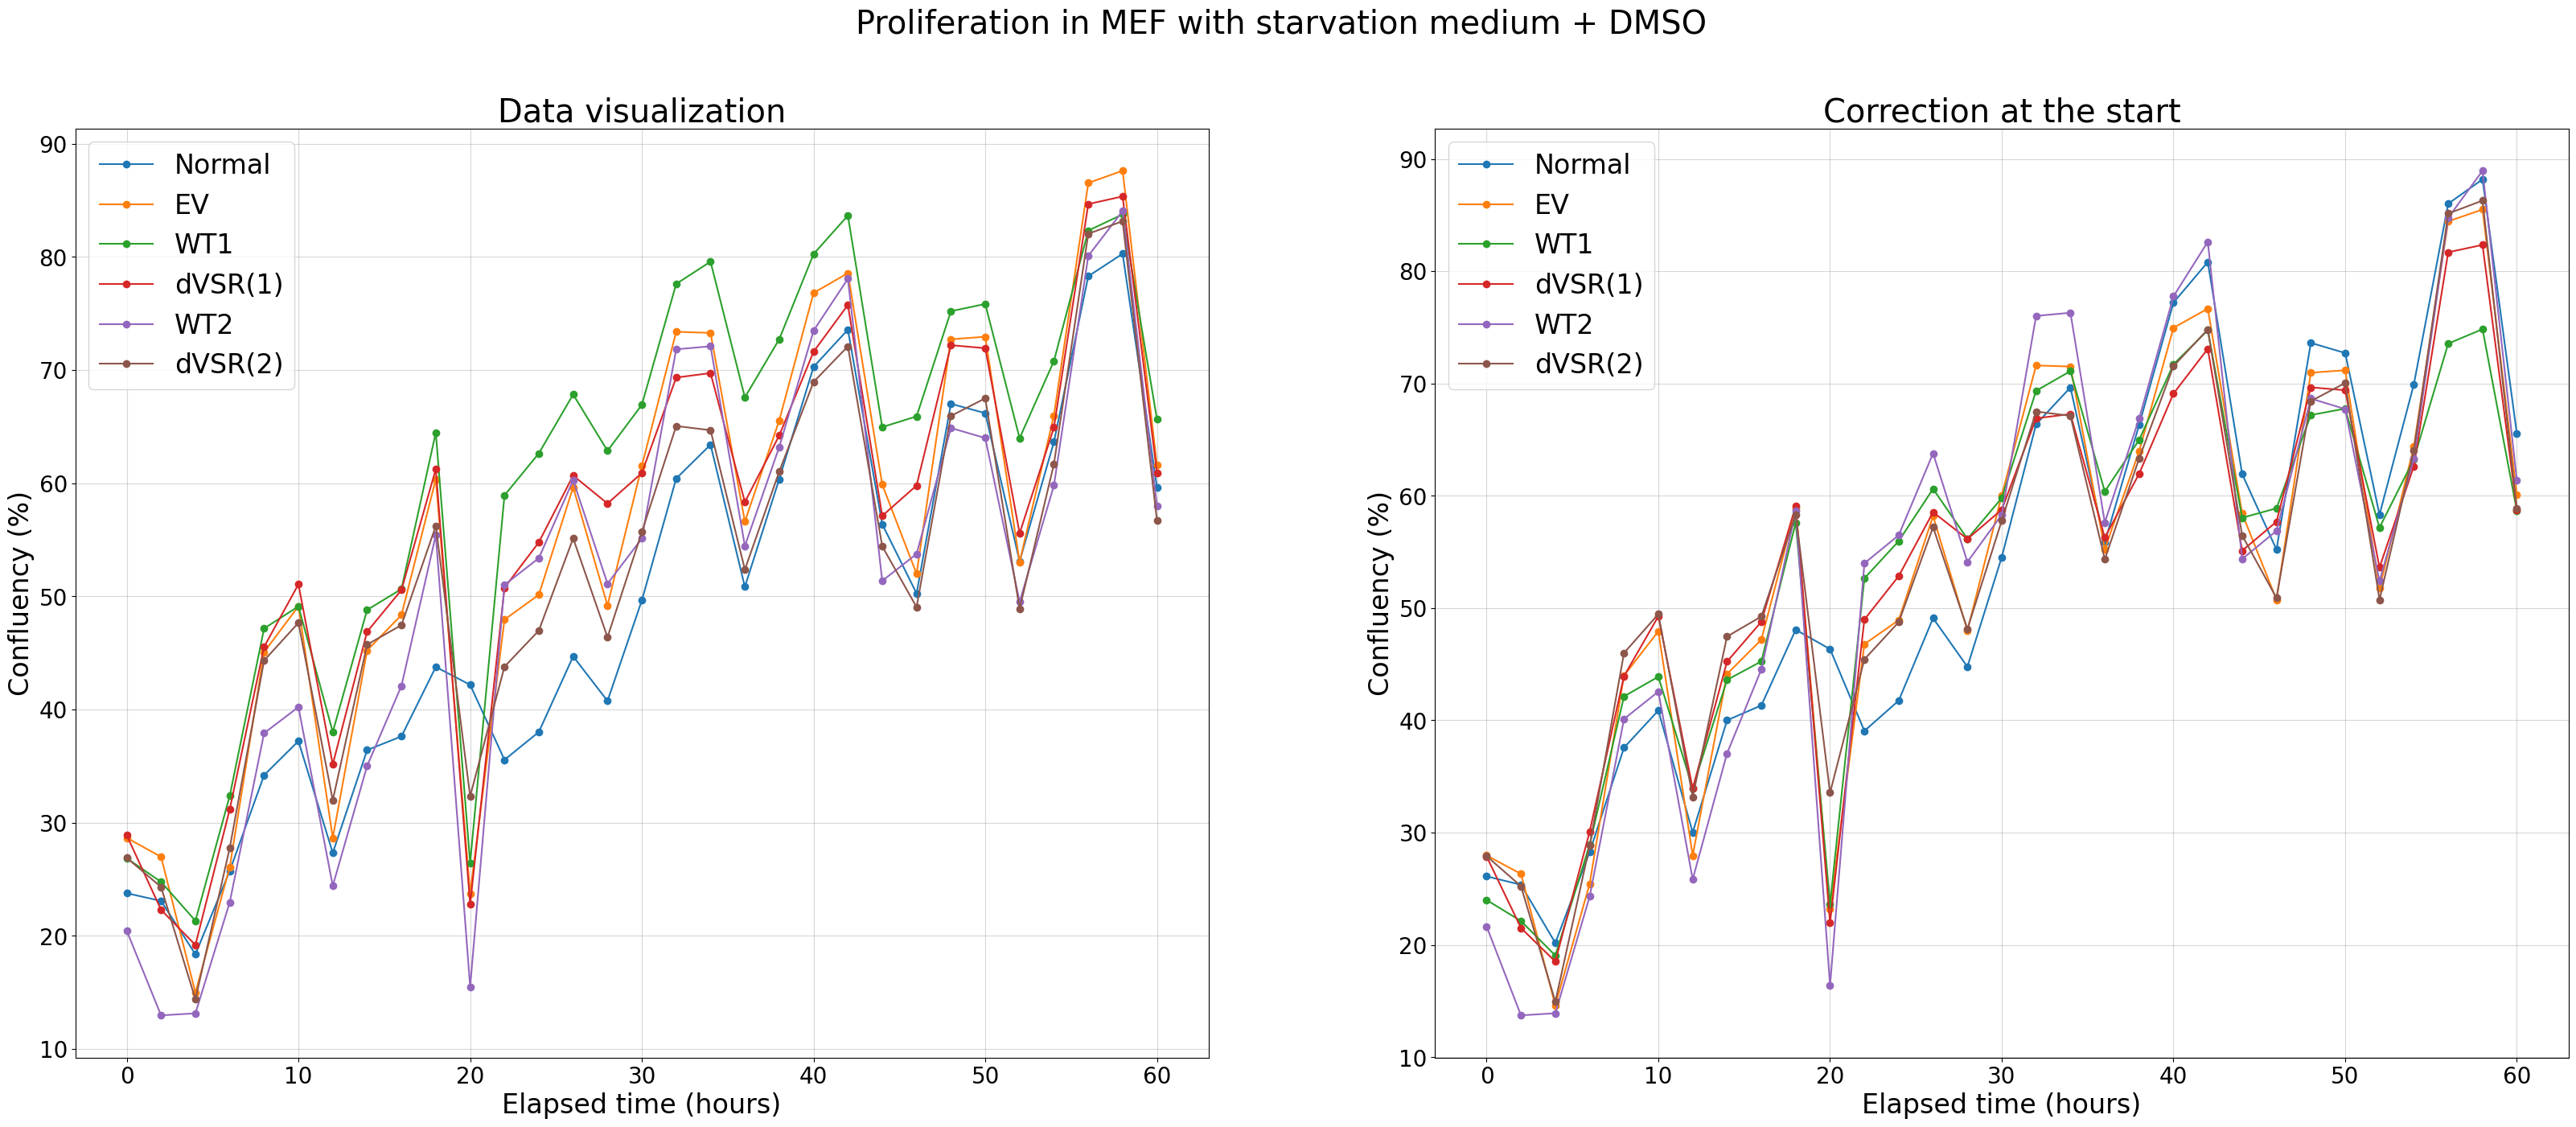

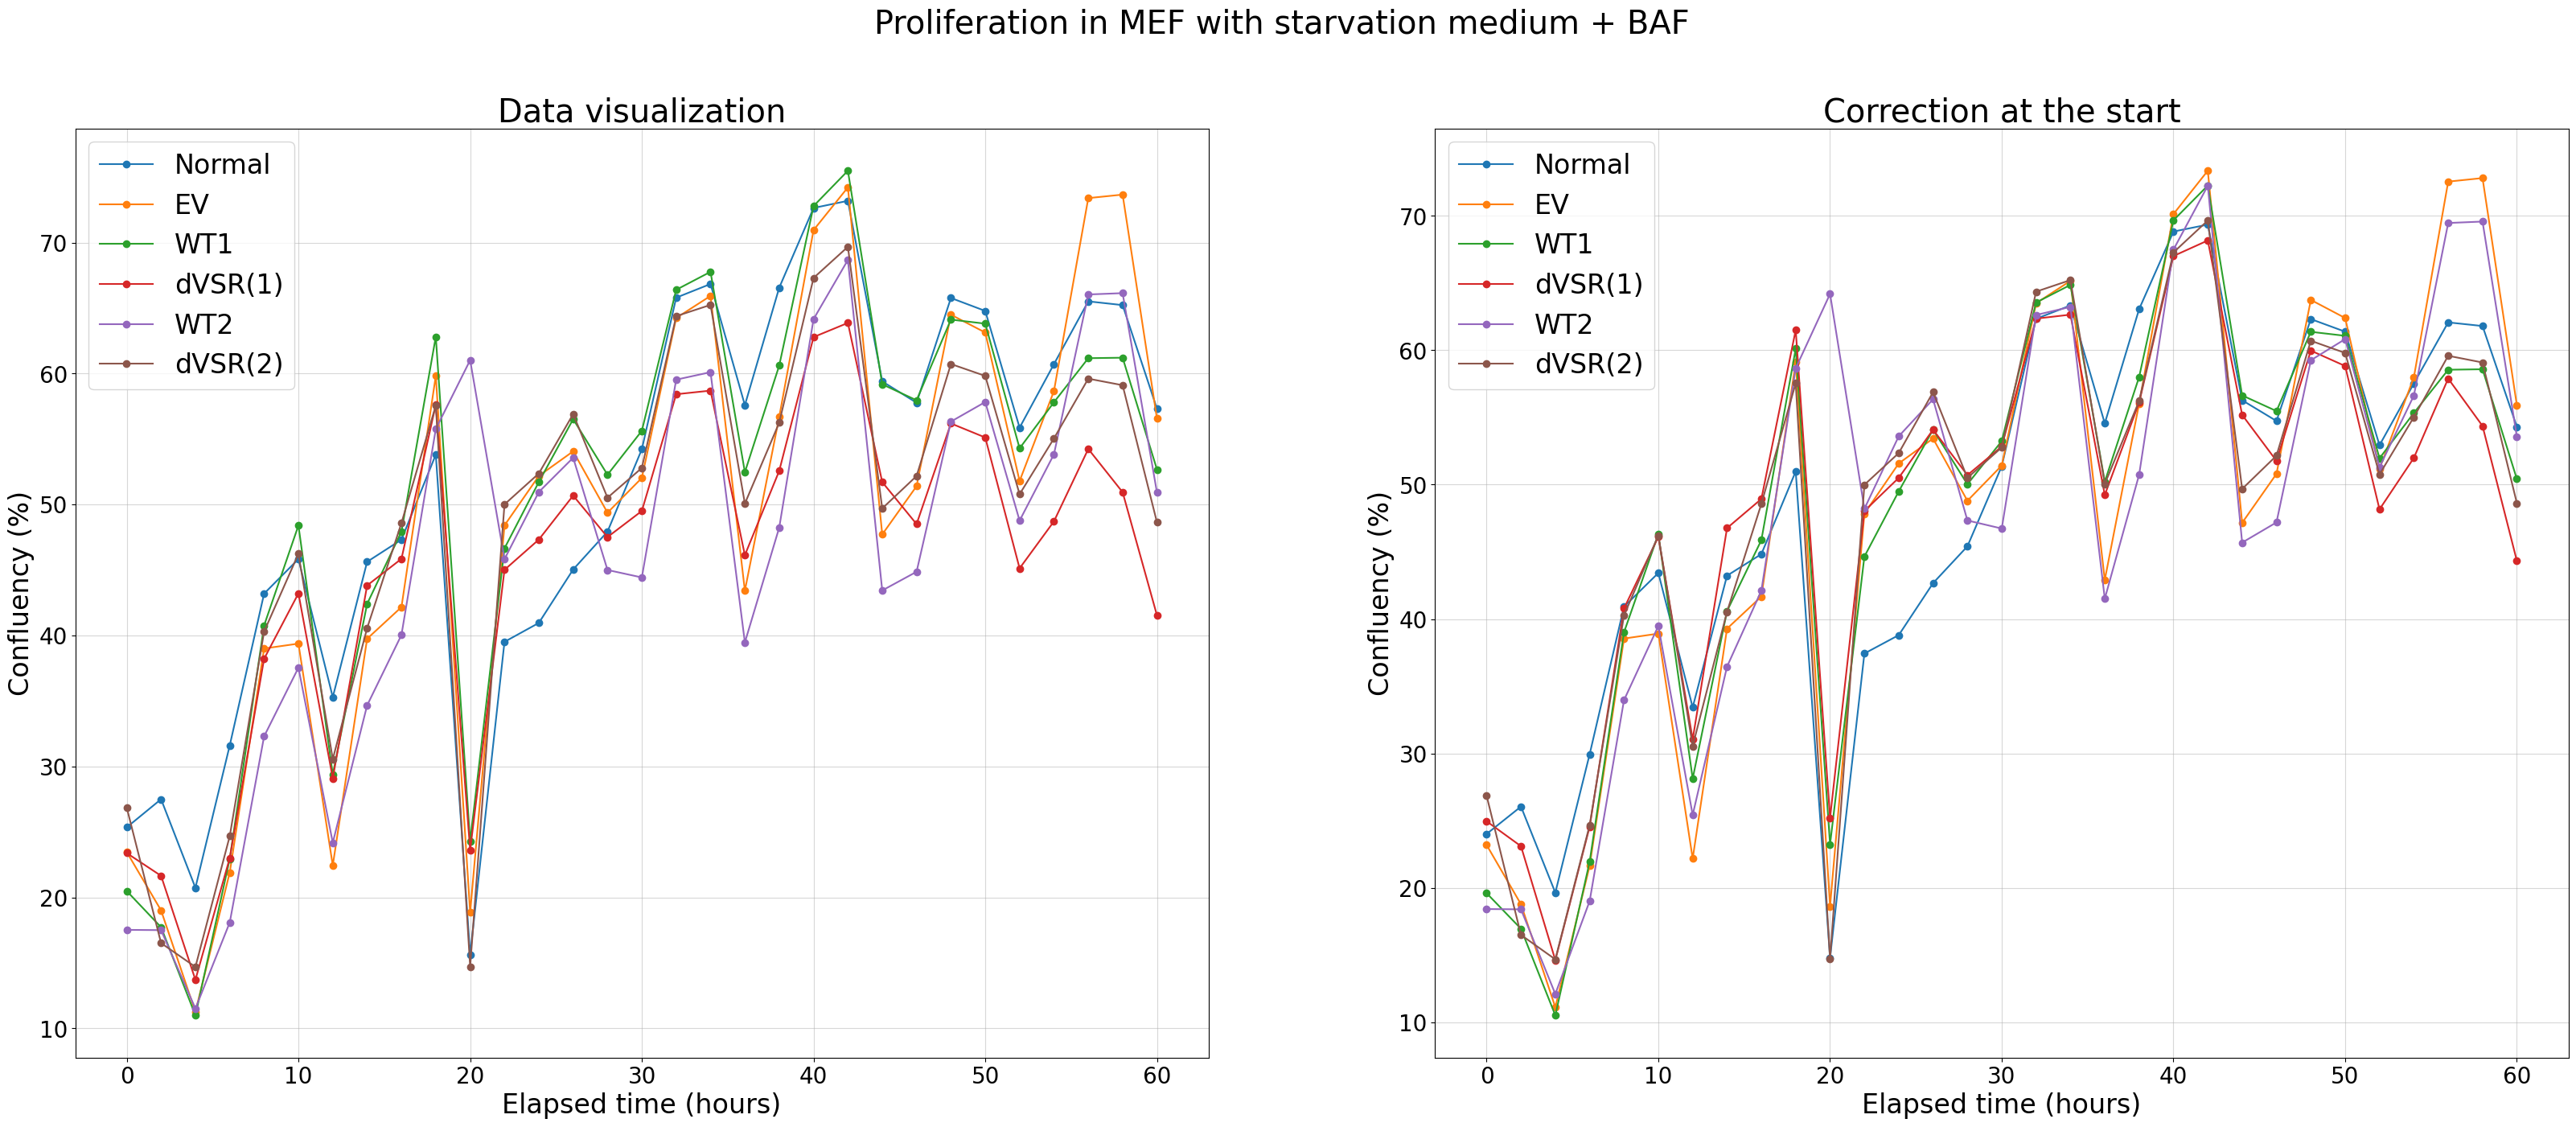

In [49]:
#Visualization of all data
columns_list = [prolif_rich_DMSO, prolif_rich_BAF, prolif_starv_DMSO, prolif_starv_BAF]
conditions = [' with normal medium + DMSO', ' with normal medium + BAF',
              ' with starvation medium + DMSO', ' with starvation medium + BAF']
drugs = ['rich_dmso', 'rich_baf', 'starv_dmso', 'starv_baf']

for i in range(len(columns_list)) :
    col_selection = columns_list[i]
    condition_label = conditions[i]
    drug = drugs[i]
    
    fig, ax = plt.subplots(1,2, figsize=(40,15))
    fig.suptitle('Proliferation in MEF'+ condition_label)
    
    for column in col_selection:     
        label_ = column.split(' ')[0]
        
        #graph 1, data visualization
        ax[0].plot(prolif_df['Elapsed'], prolif_df[column], 'o-', label= label_)
        ax[0].grid(alpha = 0.5)
        ax[0].legend()
        ax[0].set_title("Data visualization")
        ax[0].set_ylabel('Confluency (%)')
        ax[0].set_xlabel('Elapsed time (hours)')
        
        ##Correction
        shift = prolif_df[col_selection].mean()   #list of means for all columns
        general_mean = prolif_df[col_selection].mean().mean() #mean of means
        relative_mu = shift/general_mean #correction to apply for each column
        corrected_data = prolif_df[col_selection]/relative_mu #corrected data

        #graph 2, Correction at the start
        ax[1].plot(prolif_df['Elapsed'], corrected_data[column], 'o-', label= label_)
        ax[1].grid(alpha = 0.5)
        ax[1].legend()
        ax[1].set_title("Correction at the start")
        ax[1].set_ylabel('Confluency (%)')
        ax[1].set_xlabel('Elapsed time (hours)')
        
        #save the graphs
        path = output_file_directory + 'ATG7/Proliferation/exp1/graph_exp1_'    
#         fig.savefig(path+drug+'.svg')
        print()

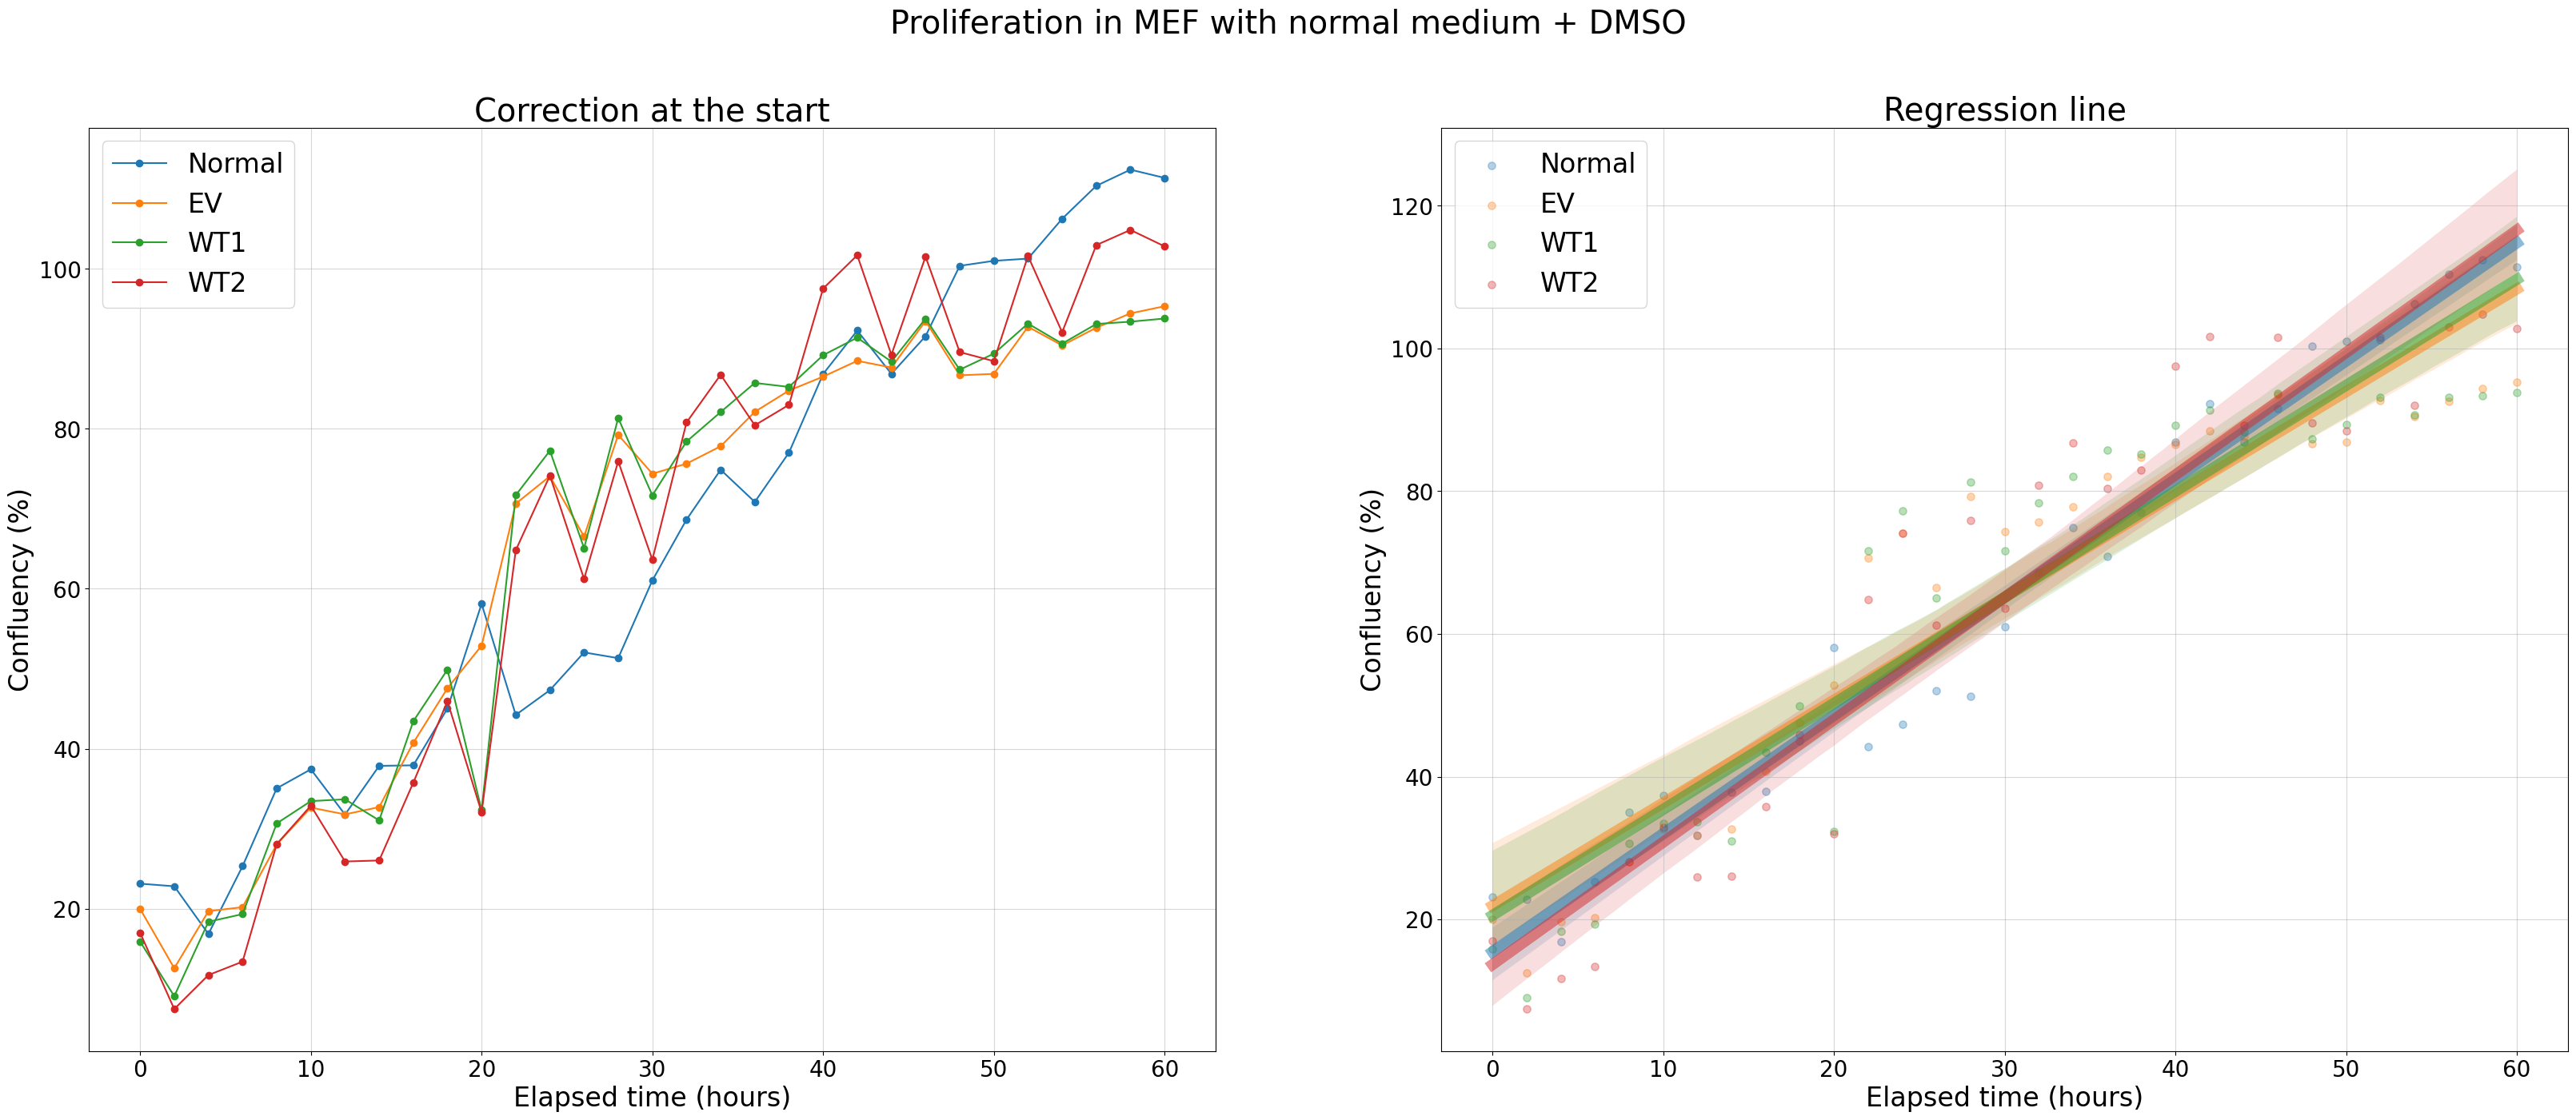

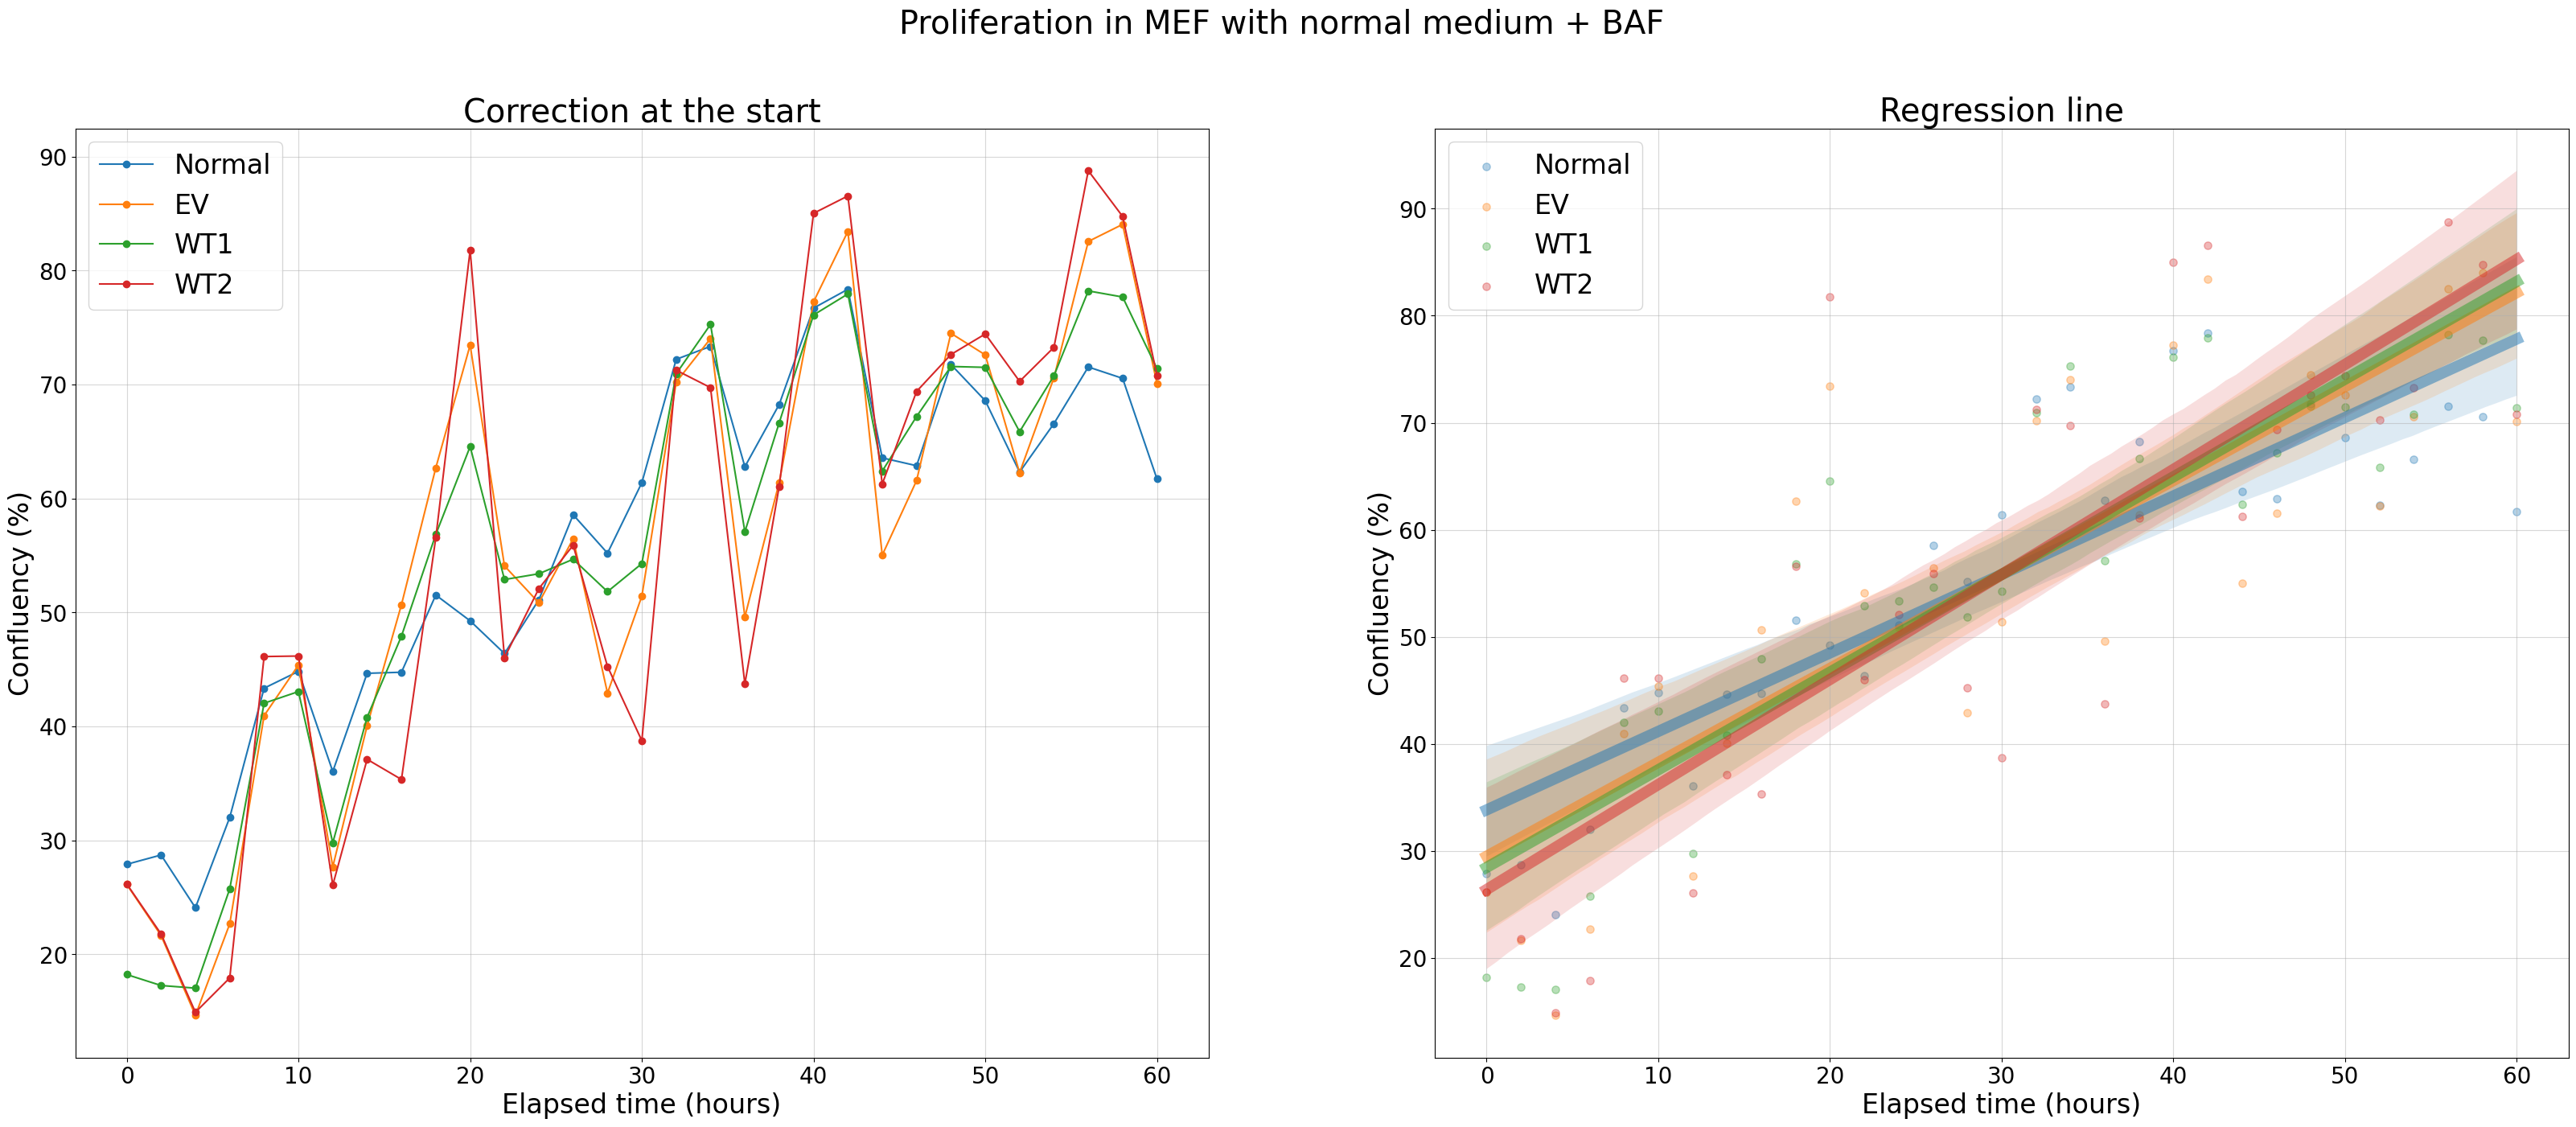

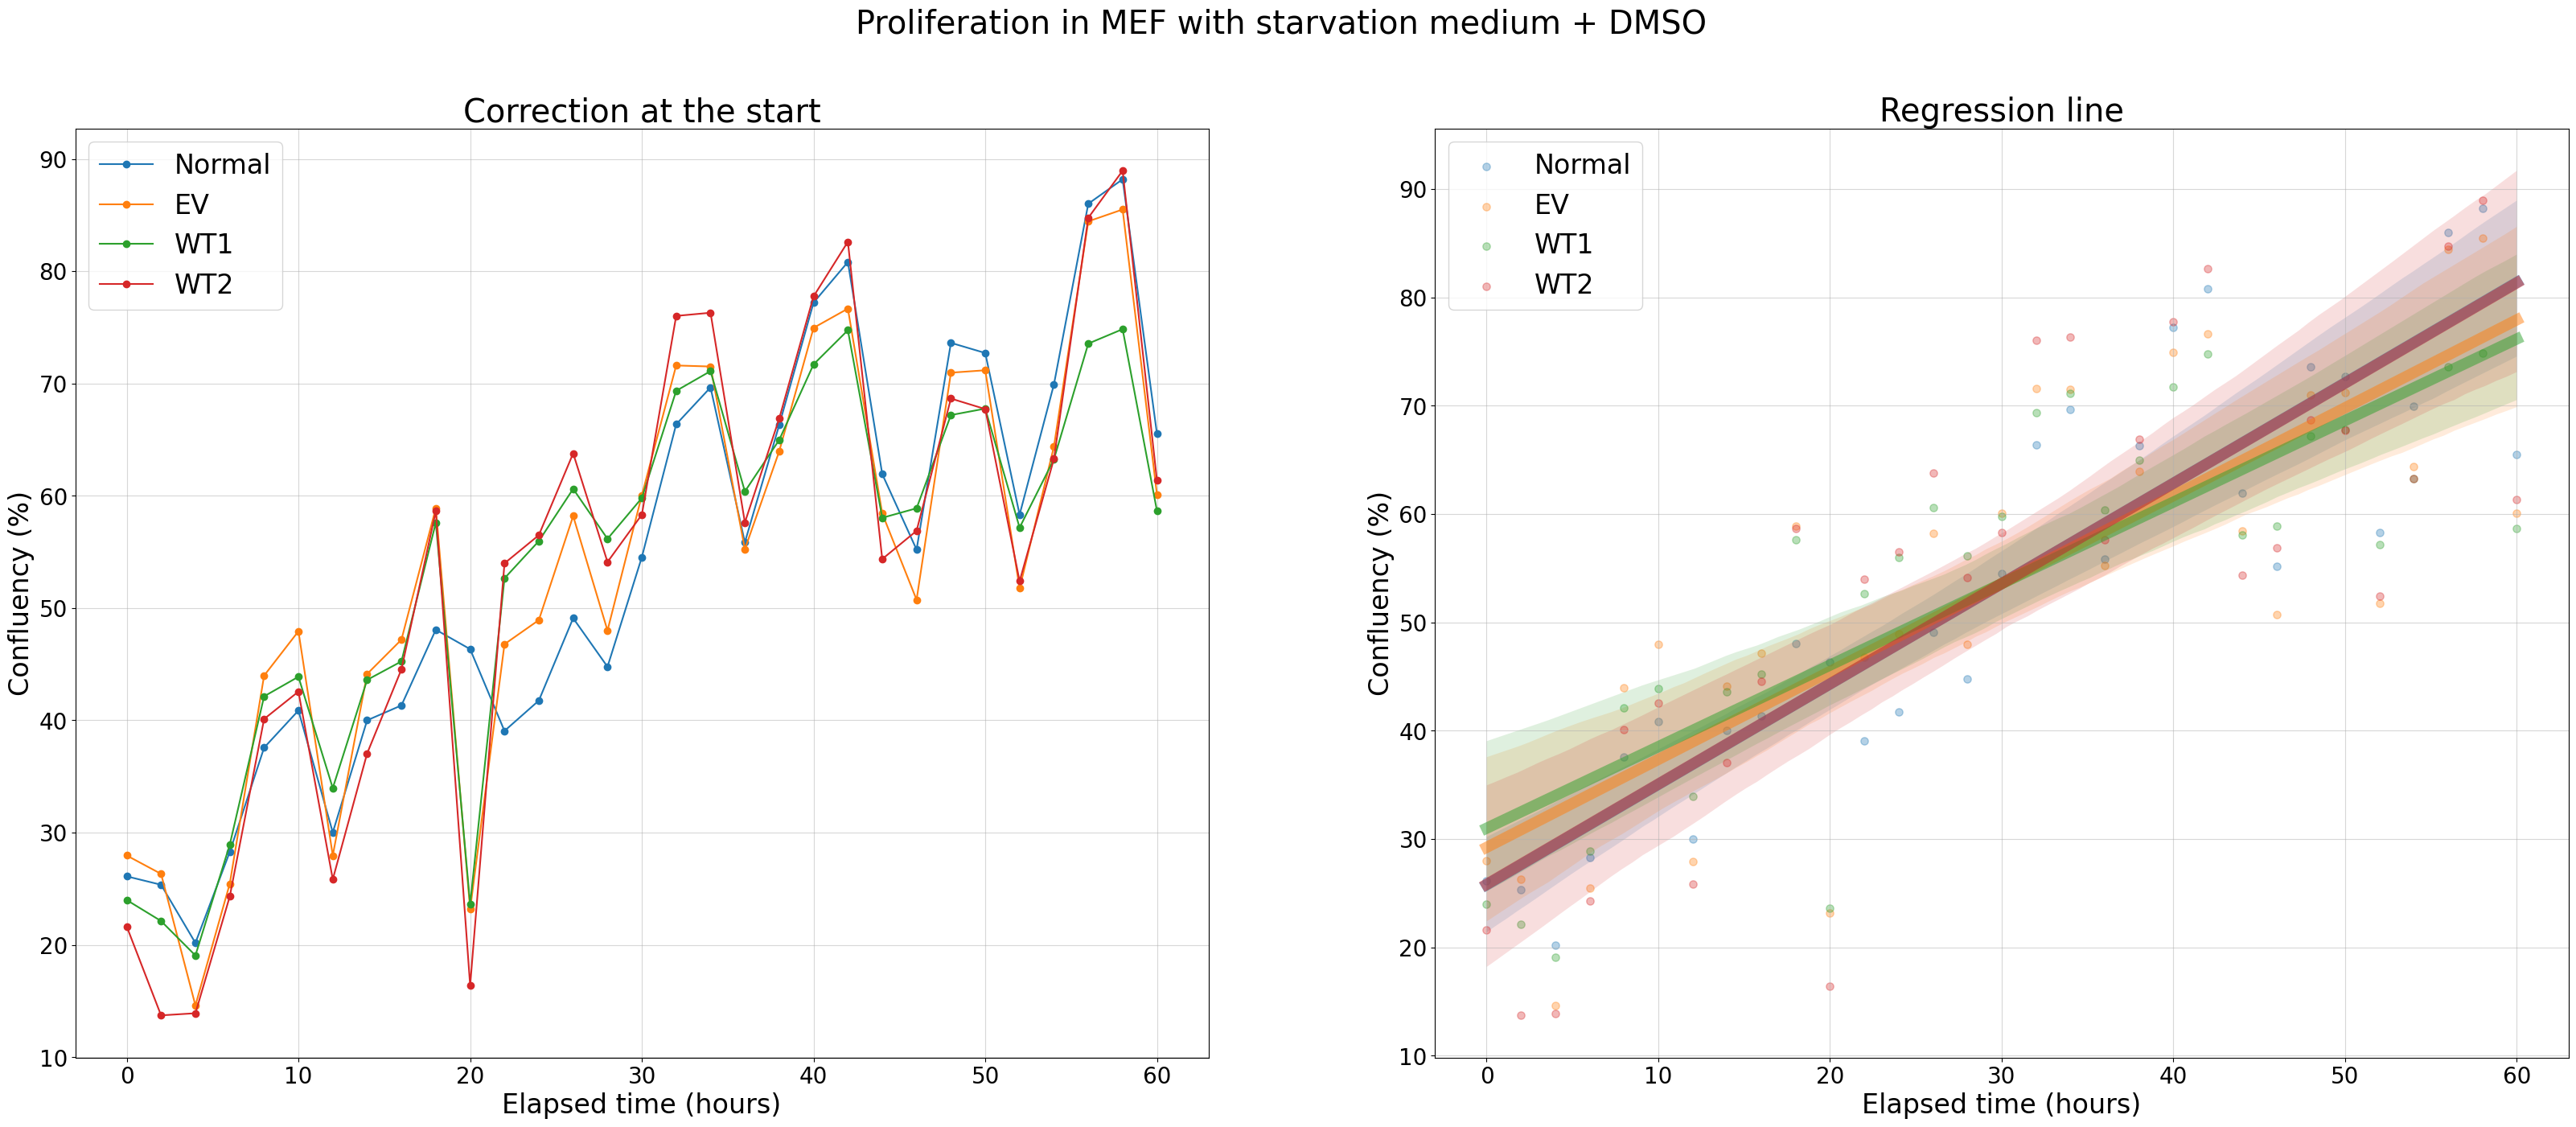

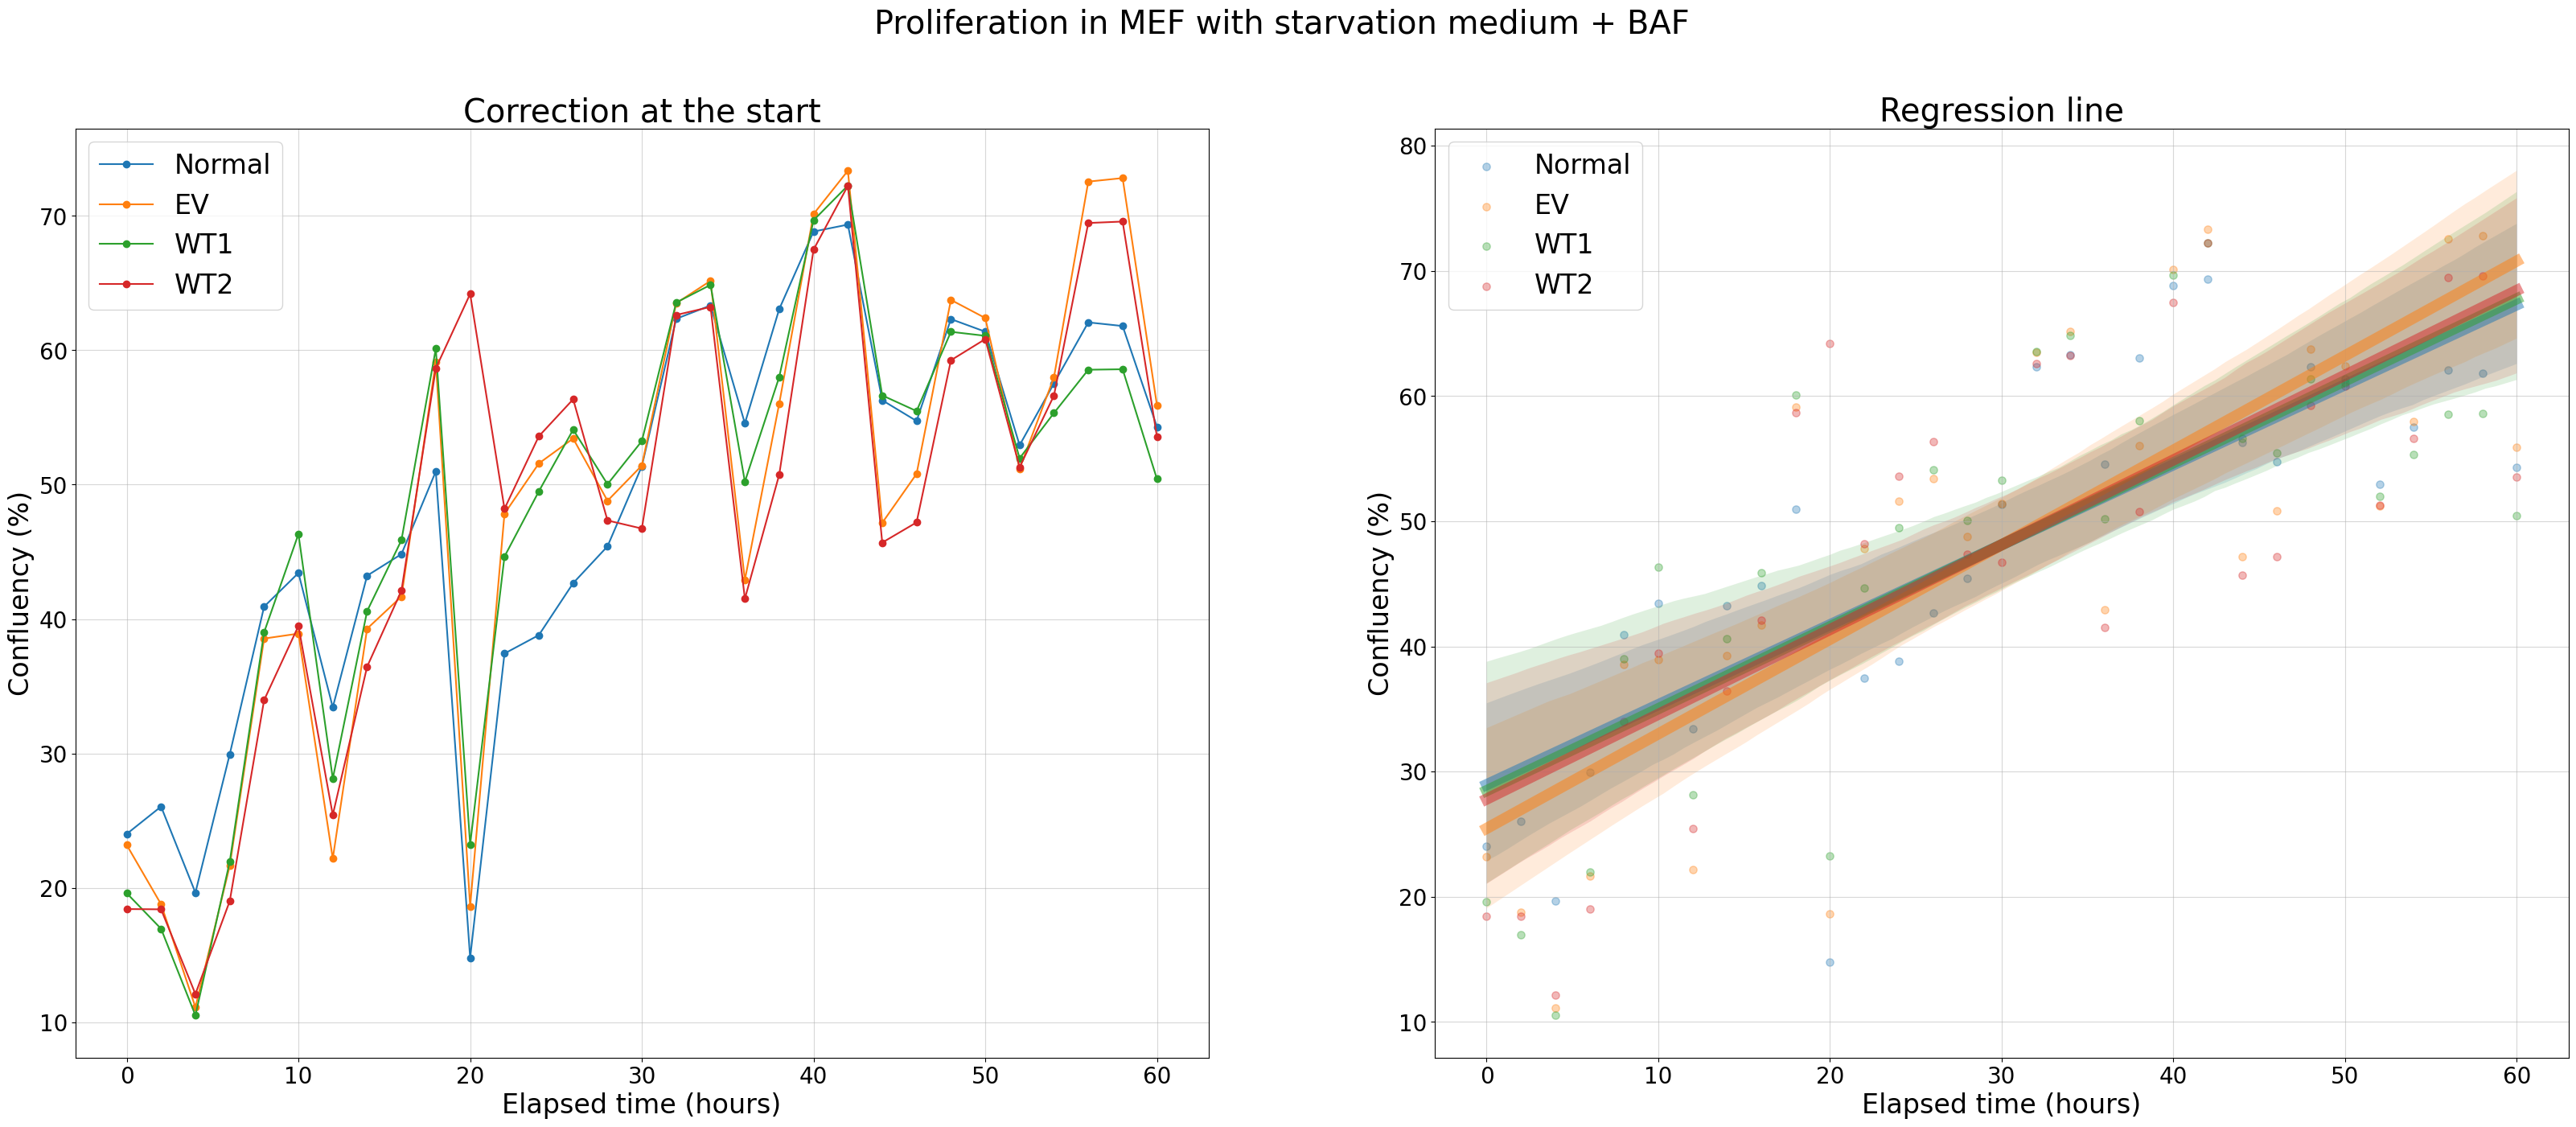

In [50]:
#Visualization of all data and regression lane
columns_list = [prolif_rich_DMSO, prolif_rich_BAF, prolif_starv_DMSO, prolif_starv_BAF]
conditions = [' with normal medium + DMSO', ' with normal medium + BAF',
              ' with starvation medium + DMSO', ' with starvation medium + BAF']
drugs = ['dmso', 'baf', 'dmso', 'baf']

corrected_dfs = []


for i in range(len(columns_list)) :
    col_selection = columns_list[i]
    condition_label = conditions[i]
    drug = drugs[i]
    
    fig, ax = plt.subplots(1,2, figsize=(40,15))
    fig.suptitle('Proliferation in MEF'+ condition_label)
    
    list_ = [0,1,2,4] #represent norm/EV/WT1/WT2 delete list_ to have all
    for column in col_selection[list_]:     
        label_ = column.split(' ')[0]
              
        ##Correction
        shift = prolif_df[col_selection].mean()   #list of means for all columns
        general_mean = prolif_df[col_selection].mean().mean() #mean of means
        relative_mu = shift/general_mean #correction to apply for each column
        corrected_data = prolif_df[col_selection]/relative_mu #corrected data
        corrected_dfs.append(corrected_data)
        
        #graph 2, Correction at the start
        x=prolif_df['Elapsed']
        y=corrected_data[column]
        ax[0].plot(x, y, 'o-', label= label_)
        ax[0].grid(alpha = 0.5)
        ax[0].legend()
        ax[0].set_title("Correction at the start")
        ax[0].set_ylabel('Confluency (%)')
        ax[0].set_xlabel('Elapsed time (hours)')
        
        #graph 3, Regression lines
        x=prolif_df['Elapsed']
        y=corrected_data[column]
        seaborn.regplot(x=x, y=y,scatter=True, line_kws={'linewidth':10, 'alpha':0.5},
                        scatter_kws={'s':45, 'alpha':1/3}, label= label_)
        ax[1].grid(alpha = 0.5)
        ax[1].legend()
        ax[1].set_title("Regression line")
        ax[1].set_ylabel('Confluency (%)')
        ax[1].set_xlabel('Elapsed time (hours)')
        
    print()

In [51]:
# # I have 6 cell lines per condition and 4 conditions
# # Only keep WT, EV, WT1, WT2
# prolif_rich_DMSO = prolif_rich_DMSO[[0,1,2,4]]
# prolif_rich_BAF = prolif_rich_BAF[[0,1,2,4]]
# prolif_starv_DMSO = prolif_starv_DMSO[[0,1,2,4]]
# prolif_starv_BAF = prolif_starv_BAF[[0,1,2,4]]

# prolif_starv_BAF

In [52]:
#Create df with corrected data
columns_list = [prolif_rich_DMSO, prolif_rich_BAF, prolif_starv_DMSO, prolif_starv_BAF]
conditions = [' with normal medium + DMSO', ' with normal medium + BAF',
              ' with starvation medium + DMSO', ' with starvation medium + BAF']
drugs = ['dmso', 'baf', 'dmso', 'baf']

corrected_dfs = []

for i in range(len(columns_list)) :
    col_selection = columns_list[i]
    condition_label = conditions[i]

    label_ = column.split(' ')[0]
              
    ##Correction
    shift = prolif_df[col_selection].mean()   #list of means for all columns
    general_mean = prolif_df[col_selection].mean().mean() #mean of means
    relative_mu = shift/general_mean #correction to apply for each column
    corrected_data = prolif_df[col_selection]/relative_mu #corrected data
    corrected_dfs.append(corrected_data)

In [53]:
#convert corrected results as dataframe
corrected_combined_dfs = pandas.concat(corrected_dfs, axis=1)
corrected_combined_dfs.insert(0, "Elapsed", prolif_df["Elapsed"])

corrected_combined_dfs.head()

Elapsed  Normal + DMEM + DMSO  EV + DMEM + DMSO  WT1 + DMEM + DMSO  \
0      0.0             23.130867         19.980109          15.893381   
1      2.0             22.806537         12.559844           9.065645   
2      4.0             16.838292         19.688267          18.371259   
3      6.0             25.321770         20.196070          19.325976   
4      8.0             35.051272         28.042154          30.662055   

   dVSR(1) + DMEM + DMSO  WT2 + DMEM + DMSO  dVSR(2) + DMEM + DMSO  \
0              19.859375          16.986908              26.533974   
1              10.329552           7.455490              22.531358   
2              16.451955          11.706864              18.028585   
3              20.084831          13.382728              32.283426   
4              34.794354          28.074754              42.244004   

   Normal + DMEM + BAF  EV + DMEM + BAF  WT1 + DMEM + BAF  ...  \
0            27.907647        26.148104         18.237181  ...   
1            28.724163        21.660454         17.274951  ...   
2            24.098714        14.655183         17.043756  ...   
3            32.026631        22.687022         25.757624  ...   
4            43.356598        40.944153         42.039168  ...   

   WT1 + Starvation + DMSO  dVSR(1) + Starvation + DMSO  \
0                23.998203                    27.872468   
1                22.130028                    21.512213   
2                19.061777                    18.518732   
3                28.927169                    30.091225   
4                42.138060                    43.937888   

   WT2 + Starvation + DMSO  dVSR(2) + Starvation + DMSO  \
0                21.639900                    27.911215   
1                13.728011                    25.229120   
2                13.917190                    14.940144   
3                24.312091                    28.826369   
4                40.120156                    46.000364   

   Normal + Starvation + BAF  EV + Starvation + BAF  WT1 + Starvation + BAF  \
0                  24.014548              23.190547               19.606033   
1                  26.050116              18.782863               16.959712   
2                  19.645448              11.124259               10.516939   
3                  29.945194              21.650284               21.956273   
4                  40.923399              38.550068               39.014681   

   dVSR(1) + Starvation + BAF  WT2 + Starvation + BAF  \
0                   24.954269               18.426491   
1                   23.101223               18.404948   
2                   14.626067               12.106017   
3                   24.556521               19.021232   
4                   40.789697               33.968604   

   dVSR(2) + Starvation + BAF  
0                   26.847190  
1                   16.501057  
2                   14.683058  
3                   24.668646  
4                   40.275039  

[5 rows x 25 columns]

# let compare at 30 hours

In [54]:
df_30h = corrected_combined_dfs[corrected_combined_dfs['Elapsed'] == 30.0]
df_30h = df_30h.melt(id_vars=["Elapsed"], var_name="conditions")
df_30h['experiment'] = "exp1"
df_30h

Elapsed                   conditions      value experiment
0      30.0         Normal + DMEM + DMSO  61.041357       exp1
1      30.0             EV + DMEM + DMSO  74.381289       exp1
2      30.0            WT1 + DMEM + DMSO  71.680724       exp1
3      30.0        dVSR(1) + DMEM + DMSO  68.598697       exp1
4      30.0            WT2 + DMEM + DMSO  63.636021       exp1
5      30.0        dVSR(2) + DMEM + DMSO  72.178784       exp1
6      30.0          Normal + DMEM + BAF  61.384392       exp1
7      30.0              EV + DMEM + BAF  51.426772       exp1
8      30.0             WT1 + DMEM + BAF  54.288853       exp1
9      30.0         dVSR(1) + DMEM + BAF  43.439048       exp1
10     30.0             WT2 + DMEM + BAF  38.750765       exp1
11     30.0         dVSR(2) + DMEM + BAF  50.217882       exp1
12     30.0   Normal + Starvation + DMSO  54.535288       exp1
13     30.0       EV + Starvation + DMSO  60.040093       exp1
14     30.0      WT1 + Starvation + DMSO  59.798684       exp1
15     30.0  dVSR(1) + Starvation + DMSO  58.760297       exp1
16     30.0      WT2 + Starvation + DMSO  58.320241       exp1
17     30.0  dVSR(2) + Starvation + DMSO  57.786242       exp1
18     30.0    Normal + Starvation + BAF  51.370401       exp1
19     30.0        EV + Starvation + BAF  51.421584       exp1
20     30.0       WT1 + Starvation + BAF  53.242228       exp1
21     30.0   dVSR(1) + Starvation + BAF  52.837993       exp1
22     30.0       WT2 + Starvation + BAF  46.734779       exp1
23     30.0   dVSR(2) + Starvation + BAF  52.772076       exp1

In [55]:
df_30h.insert(1, "Drug", df_30h['conditions'].str.split('+').str[2])
df_30h.insert(1, "Medium", df_30h['conditions'].str.split('+').str[1])
df_30h.insert(1, "samples", df_30h['conditions'].str.split('+').str[0])

df_30h.pop("conditions")
df_30h

Elapsed   samples        Medium   Drug      value experiment
0      30.0   Normal          DMEM    DMSO  61.041357       exp1
1      30.0       EV          DMEM    DMSO  74.381289       exp1
2      30.0      WT1          DMEM    DMSO  71.680724       exp1
3      30.0  dVSR(1)          DMEM    DMSO  68.598697       exp1
4      30.0      WT2          DMEM    DMSO  63.636021       exp1
5      30.0  dVSR(2)          DMEM    DMSO  72.178784       exp1
6      30.0   Normal          DMEM     BAF  61.384392       exp1
7      30.0       EV          DMEM     BAF  51.426772       exp1
8      30.0      WT1          DMEM     BAF  54.288853       exp1
9      30.0  dVSR(1)          DMEM     BAF  43.439048       exp1
10     30.0      WT2          DMEM     BAF  38.750765       exp1
11     30.0  dVSR(2)          DMEM     BAF  50.217882       exp1
12     30.0   Normal    Starvation    DMSO  54.535288       exp1
13     30.0       EV    Starvation    DMSO  60.040093       exp1
14     30.0      WT1    Starvation    DMSO  59.798684       exp1
15     30.0  dVSR(1)    Starvation    DMSO  58.760297       exp1
16     30.0      WT2    Starvation    DMSO  58.320241       exp1
17     30.0  dVSR(2)    Starvation    DMSO  57.786242       exp1
18     30.0   Normal    Starvation     BAF  51.370401       exp1
19     30.0       EV    Starvation     BAF  51.421584       exp1
20     30.0      WT1    Starvation     BAF  53.242228       exp1
21     30.0  dVSR(1)    Starvation     BAF  52.837993       exp1
22     30.0      WT2    Starvation     BAF  46.734779       exp1
23     30.0  dVSR(2)    Starvation     BAF  52.772076       exp1

In [56]:
df_dmem_30h = df_30h.loc[:11]
df_starvation_30h = df_30h.loc[12:]

In [57]:
#save Corrected_data
path = output_file_directory + 'ATG7/MEF_Huh7/Proliferation/data_for_input/'
df_dmem_30h.to_csv(path+'df_dmem_30h_exp1.csv',sep = ",", index=False)
df_starvation_30h.to_csv(path+'df_starvation_30h_exp1.csv',sep = ",", index=False)